1. Dataset:


,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,2010-12-07 14:57:00,12347,Iceland
1,537626,22729,948,2010-12-07 14:57:00,12347,Iceland
2,537626,22195,695,2010-12-07 14:57:00,12347,Iceland
3,542237,22725,636,2011-01-26 14:30:00,12347,Iceland
4,542237,22729,536,2011-01-26 14:30:00,12347,Iceland


2. Filtered Data (Germany, Year=2011):


,InvoiceDate,Qty
1185,2011-05-29 12:26:00,628
1186,2011-05-29 12:26:00,981
1187,2011-05-29 12:26:00,212
1188,2011-05-29 12:26:00,910
1189,2011-05-29 12:26:00,668


3. Total Qty per Month (2011):


,Month,Qty
0,1,101266
1,2,37800
2,3,72084
3,4,60993
4,5,103749
5,6,79711
6,7,96423
7,8,120908
8,9,104487
9,10,159490


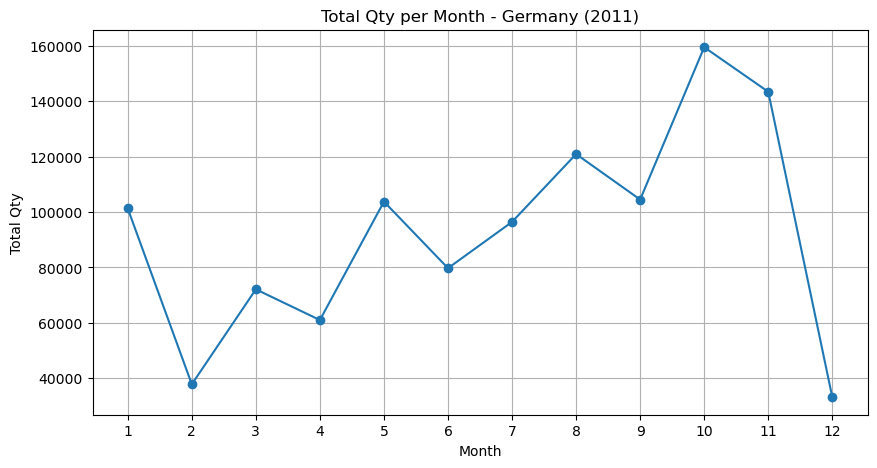

5. Prediksi TotalQty untuk Januari 2012: 71663.28


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Load dataset
dataset = pd.read_csv("transaction.csv", parse_dates=["InvoiceDate"])
print("1. Dataset:")
display(dataset.head())

# 2. Filter data untuk Qty, Country=Germany, Year=2011
data = dataset[
    (dataset['Country'] == 'Germany') &
    (dataset['InvoiceDate'].dt.year == 2011)
][['InvoiceDate', 'Qty']]
print("2. Filtered Data (Germany, Year=2011):")
display(data.head())

# 3. Ambil bulan dan akumulasi Qty
data['Month'] = data['InvoiceDate'].dt.month
TotalQty = data.groupby('Month')['Qty'].sum().reset_index()
print("3. Total Qty per Month (2011):")
display(TotalQty)

# 4. Visualisasi TotalQty
plt.figure(figsize=(10, 5))
plt.plot(TotalQty['Month'], TotalQty['Qty'], marker='o', linestyle='-')
plt.title("Total Qty per Month - Germany (2011)")
plt.xlabel("Month")
plt.ylabel("Total Qty")
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

# 5. Prediksi Qty Januari 2012 dengan Linear Regression
#    Gunakan data bulan sebagai x dan total qty sebagai y
X = TotalQty[['Month']]
y = TotalQty['Qty']
model = LinearRegression()
model.fit(X, y)

# Prediksi untuk bulan Januari 2012 (month=1)
predicted_qty = model.predict(pd.DataFrame({'Month': [1]}))[0]
print(f"5. Prediksi TotalQty untuk Januari 2012: {predicted_qty:.2f}")